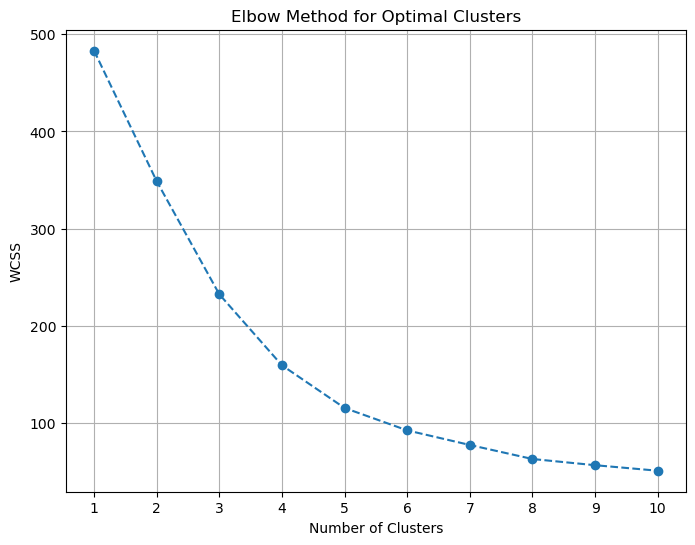

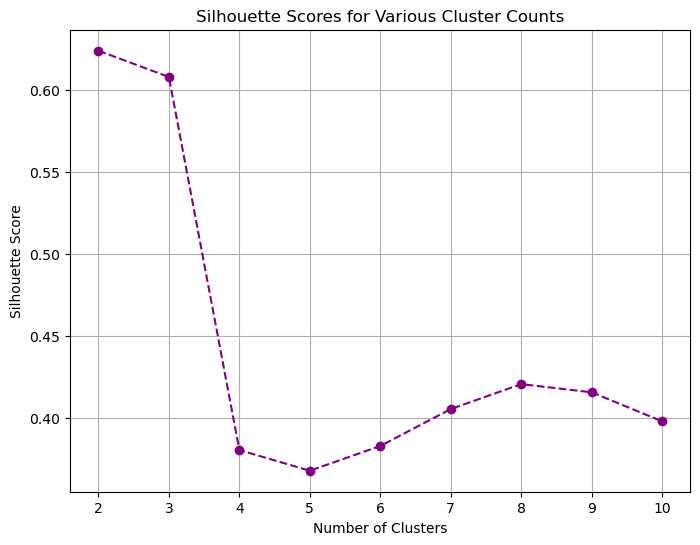

Optimal number of clusters based on silhouette analysis: 2


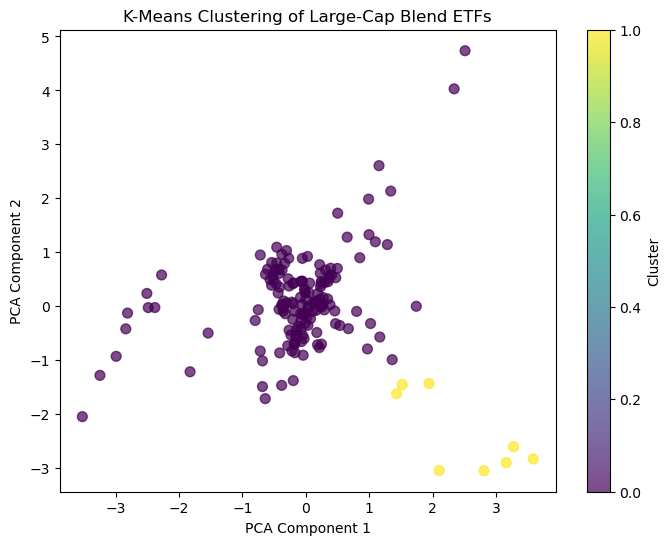

Silhouette Score: 0.6242139151185025
Explained Variance Ratio (PCA): [0.36303226 0.34026153]
Cluster Summary:
         Total Assets        YTD      Beta
Cluster                                   
0        1.636036e+06  14.201307  0.731961
1        4.899754e+07  14.691250  0.896250


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the "Large-Cap Blend" dataset
file_path = "etfs_details_category_large_cap_blend.csv"
large_cap_blend_df = pd.read_csv(file_path)

# Preprocessing: Convert relevant columns to numeric
columns_to_process = ["Total Assets", "YTD", "Beta"]  # Removed "Dividend Yield"
missing_columns = [col for col in columns_to_process if col not in large_cap_blend_df.columns]
if missing_columns:
    raise ValueError(f"The following required columns are missing in the dataset: {missing_columns}")

large_cap_blend_df["Total Assets"] = large_cap_blend_df["Total Assets"].replace('[\$,]', '', regex=True).astype(float)
large_cap_blend_df["YTD"] = large_cap_blend_df["YTD"].replace('[\%,]', '', regex=True).astype(float)
large_cap_blend_df["Beta"] = pd.to_numeric(large_cap_blend_df["Beta"], errors='coerce')

# Drop rows with missing values in the selected columns
large_cap_blend_cleaned = large_cap_blend_df[columns_to_process].dropna()

# Normalize the data
scaler = StandardScaler()
data_normalized_blend = scaler.fit_transform(large_cap_blend_cleaned)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
range_clusters = range(1, min(11, len(data_normalized_blend) + 1))
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data_normalized_blend)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range_clusters)
plt.grid()
plt.show()

# Perform Silhouette Analysis to validate the number of clusters
silhouette_scores = []
range_clusters = range(2, min(11, len(data_normalized_blend)))
for n_clusters in range_clusters:
    try:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data_normalized_blend)
        silhouette_scores.append(silhouette_score(data_normalized_blend, cluster_labels))
    except ValueError as e:
        print(f"Skipping n_clusters={n_clusters} due to error: {e}")
        silhouette_scores.append(float('nan'))

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='purple')
plt.title('Silhouette Scores for Various Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.grid()
plt.show()

# Perform K-Means clustering with the optimal number of clusters
valid_scores = [(score, idx + 2) for idx, score in enumerate(silhouette_scores) if not pd.isna(score)]
if valid_scores:
    optimal_clusters = max(valid_scores)[1]
else:
    print("No valid silhouette scores found. Defaulting to 2 clusters.")
    optimal_clusters = 2

print(f"Optimal number of clusters based on silhouette analysis: {optimal_clusters}")
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters_blend = kmeans.fit_predict(data_normalized_blend)

# Add clusters to the dataframe
large_cap_blend_cleaned["Cluster"] = clusters_blend

# Calculate Silhouette Score
sil_score_blend = silhouette_score(data_normalized_blend, clusters_blend)

# Perform PCA for dimensionality reduction (for visualization purposes)
pca = PCA(n_components=2)
data_pca_blend = pca.fit_transform(data_normalized_blend)

# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_blend[:, 0], data_pca_blend[:, 1], c=clusters_blend, cmap="viridis", s=50, alpha=0.7)
plt.title("K-Means Clustering of Large-Cap Blend ETFs")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Display clustering results
cluster_summary = large_cap_blend_cleaned.groupby("Cluster").mean()
explained_variance_blend = pca.explained_variance_ratio_

print("Silhouette Score:", sil_score_blend)
print("Explained Variance Ratio (PCA):", explained_variance_blend)
print("Cluster Summary:")
print(cluster_summary)


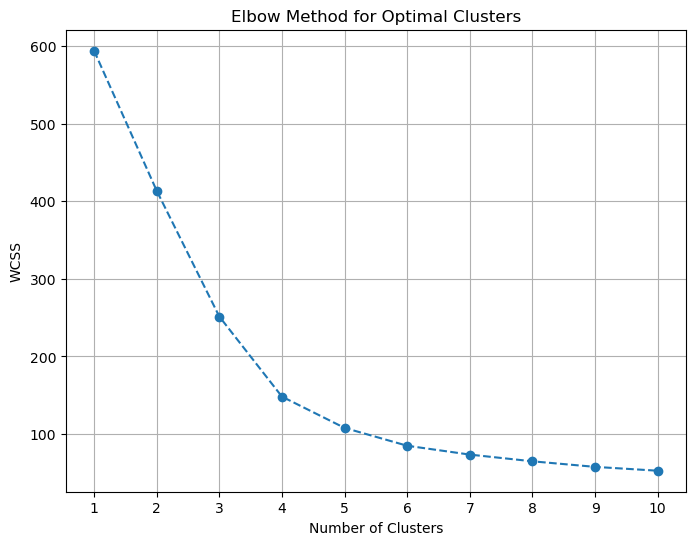

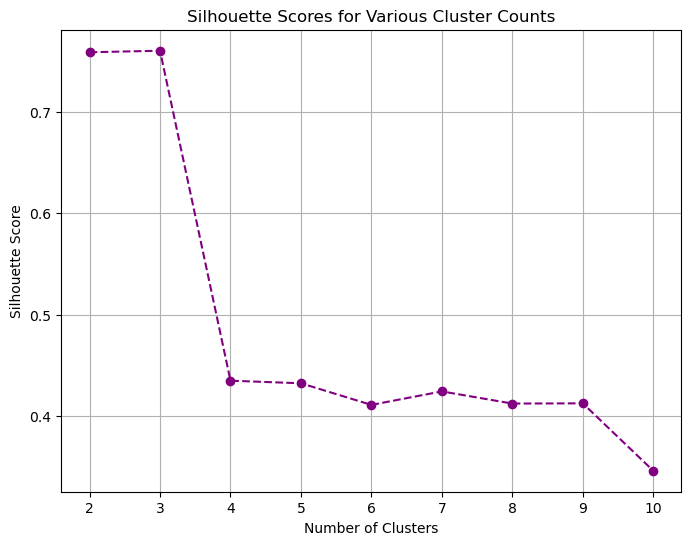

Optimal number of clusters based on silhouette analysis: 3


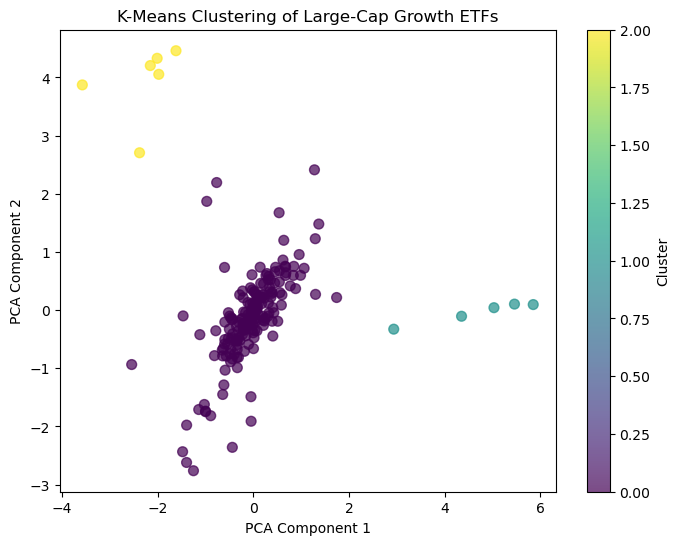

Silhouette Score: 0.7604375443466972
Explained Variance Ratio (PCA): [0.35310305 0.34216448]
Cluster Summary:
         Total Assets        YTD      Beta
Cluster                                   
0        6.676558e+06  19.375936  0.993316
1        4.730830e+08  20.336000  1.026000
2        5.801702e+05  22.566667 -1.233333


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the "Large-Cap Growth" dataset
file_path = "etfs_details_category_large_cap_growth.csv"
large_cap_growth_df = pd.read_csv(file_path)

# Preprocessing: Convert relevant columns to numeric
columns_to_process = ["Total Assets", "YTD", "Beta"]
large_cap_growth_df["Total Assets"] = large_cap_growth_df["Total Assets"].replace('[\$,]', '', regex=True).astype(float)
large_cap_growth_df["YTD"] = large_cap_growth_df["YTD"].replace('[\%,]', '', regex=True).astype(float)
large_cap_growth_df["Beta"] = pd.to_numeric(large_cap_growth_df["Beta"], errors='coerce')

# Drop rows with missing values in the selected columns
large_cap_growth_cleaned = large_cap_growth_df[columns_to_process].dropna()

# Normalize the data
scaler = StandardScaler()
data_normalized_growth = scaler.fit_transform(large_cap_growth_cleaned)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
range_clusters = range(1, min(11, len(data_normalized_growth) + 1))
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data_normalized_growth)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range_clusters)
plt.grid()
plt.show()

# Perform Silhouette Analysis to validate the number of clusters
silhouette_scores = []
range_clusters = range(2, min(11, len(data_normalized_growth)))
for n_clusters in range_clusters:
    try:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data_normalized_growth)
        silhouette_scores.append(silhouette_score(data_normalized_growth, cluster_labels))
    except ValueError as e:
        print(f"Skipping n_clusters={n_clusters} due to error: {e}")
        silhouette_scores.append(float('nan'))

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='purple')
plt.title('Silhouette Scores for Various Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.grid()
plt.show()

# Perform K-Means clustering with the optimal number of clusters
valid_scores = [(score, idx + 2) for idx, score in enumerate(silhouette_scores) if not pd.isna(score)]
if valid_scores:
    optimal_clusters = max(valid_scores)[1]
else:
    print("No valid silhouette scores found. Defaulting to 2 clusters.")
    optimal_clusters = 2

print(f"Optimal number of clusters based on silhouette analysis: {optimal_clusters}")
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters_growth = kmeans.fit_predict(data_normalized_growth)

# Add clusters to the dataframe
large_cap_growth_cleaned["Cluster"] = clusters_growth

# Calculate Silhouette Score
sil_score_growth = silhouette_score(data_normalized_growth, clusters_growth)

# Perform PCA for dimensionality reduction (for visualization purposes)
pca = PCA(n_components=2)
data_pca_growth = pca.fit_transform(data_normalized_growth)

# Visualize clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_growth[:, 0], data_pca_growth[:, 1], c=clusters_growth, cmap="viridis", s=50, alpha=0.7)
plt.title("K-Means Clustering of Large-Cap Growth ETFs")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Display clustering results
cluster_summary = large_cap_growth_cleaned.groupby("Cluster").mean()
explained_variance_growth = pca.explained_variance_ratio_

print("Silhouette Score:", sil_score_growth)
print("Explained Variance Ratio (PCA):", explained_variance_growth)
print("Cluster Summary:")
print(cluster_summary)
